<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Melting" data-toc-modified-id="Melting-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Melting</a></span></li><li><span><a href="#Pivot-or-Spread" data-toc-modified-id="Pivot-or-Spread-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Pivot or Spread</a></span></li><li><span><a href="#Tidy-Data" data-toc-modified-id="Tidy-Data-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Tidy Data</a></span></li></ul></li><li><span><a href="#Temporarily-Relocate-Model-for-Class-Review" data-toc-modified-id="Temporarily-Relocate-Model-for-Class-Review-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Temporarily Relocate Model for Class Review</a></span></li></ul></div>

# Data Reshaping and Tidy Data

In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pydataset import data
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

In [40]:
iris = datasets.load_iris()

# Create the DataFrame using 'data' and name the columns using 'feature_names'

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable, species, using 'target'. Here we get our target as a numeric value already!

iris_df['species'] = iris.target
iris_df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0


### Melting

**<font color=red>What is Meant by Melting Data?</font>**

- Going from Wide to Long Data

**<font color=orange>So What?</font>**

- This function collapses or stacks the columns together into one column with their values in a new value column.


- This can make visualizing your data much easier.


**<font color=green>Now What?</font>**

`pd.melt(df)`

OR

`df.melt()`

In [41]:
iris_df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0


In [42]:
iris_df.shape

(150, 5)

In [43]:
iris_df.melt().head(5)

,variable,value
0,sepal length (cm),5.1
1,sepal length (cm),4.9
2,sepal length (cm),4.7
3,sepal length (cm),4.6
4,sepal length (cm),5.0


In [44]:
iris_df.melt().shape

(750, 2)

In [45]:
# If you want to preserve the species column; don't melt species.

iris_df.melt(id_vars='species').sample(5)

,species,variable,value
598,2,petal width (cm),2.3
133,2,sepal length (cm),6.3
239,1,sepal width (cm),2.5
563,2,petal width (cm),2.0
520,1,petal width (cm),1.8


In [46]:
# If you want to preserve the species column and collapse only specific columns

iris_df.melt(id_vars='species', value_vars=['sepal length (cm)', 'sepal width (cm)']).sample(5)

,species,variable,value
70,1,sepal length (cm),5.9
92,1,sepal length (cm),5.8
168,0,sepal width (cm),3.8
187,0,sepal width (cm),3.6
36,0,sepal length (cm),5.5


In [47]:
# If you want to preserve mutliple columns and collapse the rest

iris_df.melt(id_vars=['species', 'sepal length (cm)', 'sepal width (cm)']).sample(5)

,species,sepal length (cm),sepal width (cm),variable,value
86,1,6.7,3.1,petal length (cm),4.7
117,2,7.7,3.8,petal length (cm),6.7
259,2,7.2,3.6,petal width (cm),2.5
280,2,7.4,2.8,petal width (cm),1.9
161,0,4.8,3.4,petal width (cm),0.2


In [48]:
# If you want to rename your new variable and value columns

iris_df.melt(id_vars='species', value_vars=['sepal length (cm)', 'sepal width (cm)'], var_name='sepal info', value_name='sepal measurements').sample(5)

,species,sepal info,sepal measurements
82,1,sepal length (cm),5.8
152,0,sepal width (cm),3.2
7,0,sepal length (cm),5.0
48,0,sepal length (cm),5.3
271,2,sepal width (cm),2.8


- To preserve an index df.reset_index().melt(id_vars=df.index)

In [49]:
iris_df.reset_index().melt(id_vars='index').sample(5)

,index,variable,value
304,4,petal length (cm),1.4
399,99,petal length (cm),4.1
178,28,sepal width (cm),3.4
217,67,sepal width (cm),2.7
689,89,species,1.0


In [50]:
iris_melt = iris_df.melt(id_vars='species', var_name='part_measurement', value_name='cm')
iris_melt.head()

,species,part_measurement,cm
0,0,sepal length (cm),5.1
1,0,sepal length (cm),4.9
2,0,sepal length (cm),4.7
3,0,sepal length (cm),4.6
4,0,sepal length (cm),5.0


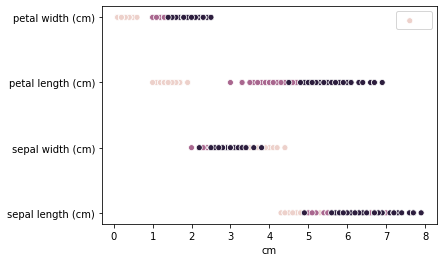

In [51]:
sns.scatterplot(y='part_measurement', x='cm', data=iris_melt, hue='species')

plt.ylabel('')
plt.legend([''])
plt.show()

### Pivot or Spread 

**<font color=red>What is meant by Pivoting or Spreading Data?</font>**

- Going from Long to Wide Data

**<font color=orange>So What?</font>**



**<font color=green>Now What?</font>**

 df.pivot_table(values,   rows,   columns)

`df.pivot_table(values= , index= , columns= )`

OR

`df.pivot_table(values= , index=['', ''], columns= )`

- Default in pivot_table: (aggfunc='mean')

In [52]:
iris_pivot = iris_melt.pivot_table(values='cm', index='species', columns='part_measurement')
iris_pivot.columns.tolist()

['petal length (cm)',
 'petal width (cm)',
 'sepal length (cm)',
 'sepal width (cm)']

In [53]:
iris_pivot.head(1)

part_measurement,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
species,,,,
0,1.462,0.246,5.006,3.428


In [54]:
iris_pivot.reset_index()

part_measurement,species,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,0,1.462,0.246,5.006,3.428
1,1,4.260,1.326,5.936,2.770
2,2,5.552,2.026,6.588,2.974


### Tidy Data

**<font color=red>What is Tidy Data?</font>**

- Data is Tabular, made up of rows and columns.


- The intersection of a row and column is a cell with only one value in it.


- Each varaible is a column.


- Each row is an observation.


**<font color=orange>So What?</font>**

- You have the ability to answer questions with a Groupby()


- If a dataset is Tidy, there shouldn't be any Null Values. You can drop Nulls without losing data.

**<font color=green>Now What?</font>**

Super Nifty snippet

`df.col.str.split(' ', expland=True)`

## Temporarily Relocate Model for Class Review

In [ ]:
## Modeling

### **<font color=red>What Are Types of Classification Models?</font>**

>**Logistic Regression Model**

- Returns the probability of an observation being in the positive class.


- **Overall**, makes a great baseline model because of the quick and easy implementation and ease of interpretation.



- **Pros:** Easy to interpret, fast to train and predict


- **Cons:** Not as interpretable as showing a picture like a Decision Tree Classifier, assumption that the X predictors are independent, multi-class classification gets more complicated to interpret and explain




### **<font color=orange>So What?</font>**

- Both Scikit-Learn and Statsmodels can be used to create and evaluate Logistic Regression Classifiers.


- When we have a multiclass classifier, the coefficients of the X variables inform us of their importance.


- Our predictions are a number between 0 and 1 informing us of the probability that an observation is in the positive class.


- We can set a threshold to 'snap' our probabilities to a 0 or 1, not a member of our positive class or member of the positive class respectively.


- As you decrease your threshold, the Recall of your model increases. This is a good idea when you want to decrease your Type II errors or False Negatives. When it's more costly to miss a positive, you might decrease your threshold a bit.


- As you increase your threshold, the Precision of your model increases. This is a good idea when you want to make sure that your model has less Type I errors or False Positives. When it's more costly to falsely identify an observation as a positive case that is actually a negative case, you might want to increase your threshold a bit.

### **<font color=green>Now What?</font>**



----

>**Logistic Regression**


>**Decision Tree Model**


>**Random Forest Model**


>**K-Nearest Neighbor****